In [16]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [17]:
#First build a 3D dataset
np.random.seed(4)

def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m)/2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m)/2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

X_train = generate_3d_data(60)

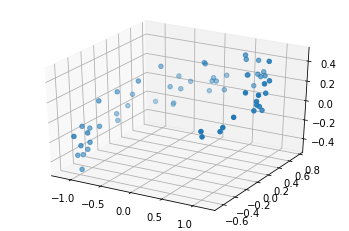

In [21]:
ax = plt.axes(projection='3d')
ax.scatter3D(X_train[:, 0], X_train[:, 1], X_train[:, 2])

In [24]:
np.random.seed(42)
tf.random.set_seed(42)

encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])
autoencoder = keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss="mse", optimizer = keras.optimizers.SGD(lr = 1.5))

In [25]:
history = autoencoder.fit(X_train, X_train, epochs = 20)

Epoch 1/20
2/2 [==============================] - 0s 2ms/step - loss: 0.2871
Epoch 2/20
2/2 [==============================] - 0s 1ms/step - loss: 0.2985
Epoch 3/20
2/2 [==============================] - 0s 2ms/step - loss: 0.1694
Epoch 4/20
2/2 [==============================] - 0s 1ms/step - loss: 0.0687
Epoch 5/20
2/2 [==============================] - 0s 1ms/step - loss: 0.0528
Epoch 6/20
2/2 [==============================] - 0s 999us/step - loss: 0.0456
Epoch 7/20
2/2 [==============================] - 0s 1ms/step - loss: 0.0428
Epoch 8/20
2/2 [==============================] - 0s 2ms/step - loss: 0.0302
Epoch 9/20
2/2 [==============================] - 0s 998us/step - loss: 0.0214
Epoch 10/20
2/2 [==============================] - 0s 1ms/step - loss: 0.0159
Epoch 11/20
2/2 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 12/20
2/2 [==============================] - 0s 1ms/step - loss: 0.0097
Epoch 13/20
2/2 [==============================] - 0s 1ms/step - loss

In [26]:
codings = encoder.predict(X_train)

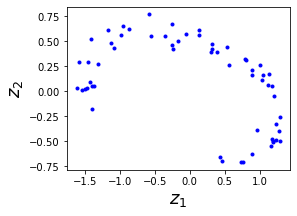

In [27]:
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:, 0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize = 18)
plt.ylabel("$z_2$", fontsize = 18)
plt.show()